## Загрузка и исследовательский анализ данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import gdown

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1hV8gpJGGW-ox0J-7oRLzamxH0VMSPkoZ/edit?usp=sharing&ouid=108853664472972134783&rtpof=true&sd=true'
output_path = 'concat_sample.xlsx'
gdown.download(url, output_path, quiet=False, fuzzy=True)
data = pd.read_excel(output_path)

Downloading...
From: https://drive.google.com/uc?id=1hV8gpJGGW-ox0J-7oRLzamxH0VMSPkoZ
To: C:\Users\potkd\jupyter\my_projects\concat_sample.xlsx
100%|█████████████████████████████████████████████████████████████████████████████| 27.5k/27.5k [00:00<00:00, 24.1MB/s]


In [3]:
data = data.iloc[8:, :]
data.reset_index(inplace=True, drop=True)
data.head(10)

,date,key_rate,USD,unemployment,MIACR,SA_M2,inf_exp,key_rate_lag_1,key_rate_lag_3,key_rate_lag_6,...,MIACR_lag_1,MIACR_lag_3,MIACR_lag_6,SA_M2_lag_1,SA_M2_lag_3,SA_M2_lag_6,inf_exp_lag_1,inf_exp_lag_3,inf_exp_lag_6,inflation
0,9.2014,8.0,39.57,0.049,7.95,30566.453628,12.5,8.0,7.5,7.0,...,7.88,8.23,7.85,30330.951084,29826.981754,29966.288667,11.8,11.7,11.65,8.03
1,10.2014,8.0,43.03,0.051,8.24,30736.744857,13.8,8.0,8.0,7.5,...,7.95,8.17,7.87,30566.453628,29965.108154,29375.261508,12.5,11.3,11.50,8.29
2,11.2014,9.5,50.41,0.052,10.21,30687.329065,13.1,8.0,8.0,7.5,...,8.24,7.88,8.21,30736.744857,30330.951084,29824.222698,13.8,11.8,12.70,9.06
3,12.2014,17.0,55.91,0.053,15.47,30753.520091,15.5,9.5,8.0,7.5,...,10.21,7.95,8.23,30687.329065,30566.453628,29826.981754,13.1,12.5,11.70,11.35
4,1.2015,17.0,68.86,0.055,16.96,30813.965221,16.6,17.0,8.0,8.0,...,15.47,8.24,8.17,30753.520091,30736.744857,29965.108154,15.5,13.8,11.30,14.96
5,2.2015,15.0,61.62,0.058,15.12,30916.346879,18.1,17.0,9.5,8.0,...,16.96,10.21,7.88,30813.965221,30687.329065,30330.951084,16.6,13.1,11.80,16.70
6,3.2015,14.0,58.20,0.059,14.90,30986.101967,15.7,15.0,17.0,8.0,...,15.12,15.47,7.95,30916.346879,30753.520091,30566.453628,18.1,15.5,12.50,16.90
7,4.2015,14.0,51.65,0.058,14.36,30823.431605,14.0,14.0,17.0,8.0,...,14.90,16.96,8.24,30986.101967,30813.965221,30736.744857,15.7,16.6,13.80,16.40
8,5.2015,12.5,52.32,0.056,12.83,31566.075251,14.3,14.0,15.0,9.5,...,14.36,15.12,10.21,30823.431605,30916.346879,30687.329065,14.0,18.1,13.10,15.80
9,6.2015,11.5,55.28,0.054,12.50,31674.770675,15.0,12.5,14.0,17.0,...,12.83,14.90,15.47,31566.075251,30986.101967,30753.520091,14.3,15.7,15.50,15.30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                101 non-null    float64
 1   key_rate            101 non-null    float64
 2   USD                 101 non-null    float64
 3   unemployment        101 non-null    float64
 4   MIACR               101 non-null    float64
 5   SA_M2               101 non-null    float64
 6   inf_exp             101 non-null    float64
 7   key_rate_lag_1      101 non-null    float64
 8   key_rate_lag_3      101 non-null    float64
 9   key_rate_lag_6      101 non-null    float64
 10  USD_lag_1           101 non-null    float64
 11  USD_lag_3           101 non-null    float64
 12  USD_lag_6           101 non-null    float64
 13  unemployment_lag_1  101 non-null    float64
 14  unemployment_lag_3  101 non-null    float64
 15  unemployment_lag_6  101 non-null    float64
 16  MIACR_la

## Применение модели линейной регрессии

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [6]:
X = data.iloc[:, 1:25].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [7]:
lin_model = LinearRegression()

In [8]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [10]:
print(f'MSE на тренировочной выборке: {mean_squared_error(lin_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(lin_model.predict(X_test), y_test):.3f}')
MSE_1 = f'MSE = {mean_squared_error(lin_model.predict(X), y):.3f}'

MSE на тренировочной выборке: 1.638
MSE на тестовой выборке: 2.987


In [11]:
r2_1 = f'R_square = {r2_score(lin_model.predict(X), y):.3f}'

In [12]:
params = dict()
params['alpha'] =  np.logspace(-5, 5, 100, endpoint=True)
params['l1_ratio'] = np.arange(0, 1, 0.01)
regressor = ElasticNet()

rs_cv= GridSearchCV(regressor, params, n_jobs=-1, scoring=None, cv=5, verbose=0, refit=True)
rs_cv.fit(X_train, y_train)

C:\Users\potkd\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e+02, tolerance: 1.745e-01
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04, 2.59502421e-04, 3.27454916e-04,
       4.13201240e-04, 5.21400829e-04, 6....
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])})

In [14]:
print(f'MSE на тренировочной выборке: {mean_squared_error(rs_cv.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(rs_cv.predict(X_test), y_test):.3f}')
MSE_2 = f'MSE = {mean_squared_error(rs_cv.predict(X), y):.3f}'

MSE на тренировочной выборке: 2.471
MSE на тестовой выборке: 3.992


In [15]:
r2_2 = f'R_square = {r2_score(rs_cv.predict(X), y):.3f}'

Text(40, 10, 'R_square = 0.835')

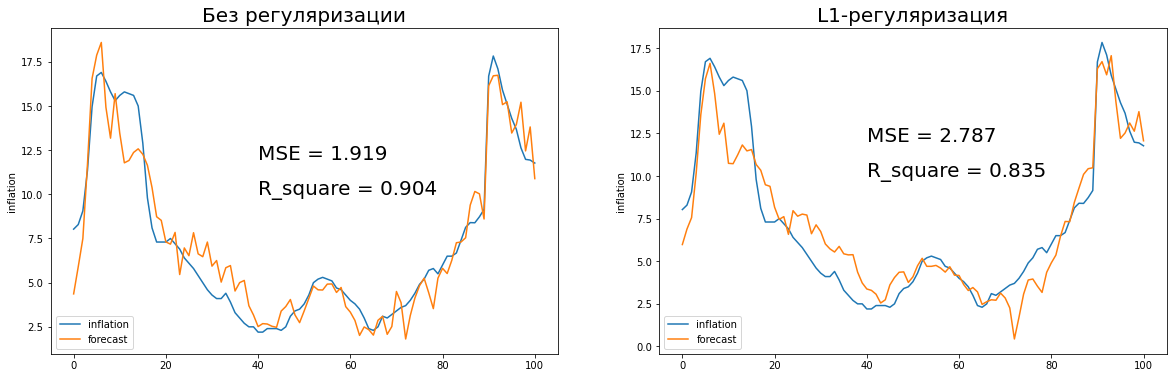

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
x = np.arange(0, 101)
for axis in axes:
    sns.lineplot(data=data, x=x, y='inflation', label='inflation', ax=axis)
sns.lineplot(data=data, x=x, y=lin_model.predict(X), label='forecast', ax=axes[0])
sns.lineplot(data=data, x=x, y=rs_cv.predict(X), label='forecast', ax=axes[1])
axes[0].set_title('Без регуляризации', fontsize=(20))
axes[1].set_title('L1-регуляризация', fontsize=(20))
axes[0].text(40, 12, MSE_1, fontsize=20)
axes[0].text(40, 10, r2_1, fontsize=20)
axes[1].text(40, 12, MSE_2, fontsize=20)
axes[1].text(40, 10, r2_2, fontsize=20)

## Применение градиентного бустинга на решающих деревьях

In [18]:
from catboost import CatBoostRegressor

In [19]:
boost_model = CatBoostRegressor()

In [20]:
boost_model.fit(X_train, y_train)

Learning rate set to 0.027471
0:	learn: 4.5995137	total: 165ms	remaining: 2m 44s
1:	learn: 4.5289325	total: 166ms	remaining: 1m 22s
2:	learn: 4.4663366	total: 167ms	remaining: 55.5s
3:	learn: 4.3964297	total: 168ms	remaining: 41.8s
4:	learn: 4.3407855	total: 169ms	remaining: 33.6s
5:	learn: 4.2753780	total: 170ms	remaining: 28.1s
6:	learn: 4.2078639	total: 171ms	remaining: 24.2s
7:	learn: 4.1567257	total: 171ms	remaining: 21.3s
8:	learn: 4.0891857	total: 172ms	remaining: 19s
9:	learn: 4.0299612	total: 173ms	remaining: 17.1s
10:	learn: 3.9686187	total: 174ms	remaining: 15.6s
11:	learn: 3.8993452	total: 175ms	remaining: 14.4s
12:	learn: 3.8442503	total: 176ms	remaining: 13.3s
13:	learn: 3.7861602	total: 177ms	remaining: 12.4s
14:	learn: 3.7380930	total: 178ms	remaining: 11.7s
15:	learn: 3.6764493	total: 179ms	remaining: 11s
16:	learn: 3.6283276	total: 180ms	remaining: 10.4s
17:	learn: 3.5743967	total: 181ms	remaining: 9.9s
18:	learn: 3.5170437	total: 182ms	remaining: 9.42s
19:	learn: 3.4

186:	learn: 0.4897667	total: 341ms	remaining: 1.48s
187:	learn: 0.4839462	total: 343ms	remaining: 1.48s
188:	learn: 0.4806617	total: 344ms	remaining: 1.48s
189:	learn: 0.4768176	total: 345ms	remaining: 1.47s
190:	learn: 0.4721377	total: 346ms	remaining: 1.46s
191:	learn: 0.4683510	total: 347ms	remaining: 1.46s
192:	learn: 0.4638090	total: 348ms	remaining: 1.45s
193:	learn: 0.4595321	total: 349ms	remaining: 1.45s
194:	learn: 0.4555225	total: 350ms	remaining: 1.44s
195:	learn: 0.4514749	total: 351ms	remaining: 1.44s
196:	learn: 0.4476743	total: 352ms	remaining: 1.43s
197:	learn: 0.4425367	total: 353ms	remaining: 1.43s
198:	learn: 0.4380434	total: 354ms	remaining: 1.42s
199:	learn: 0.4338991	total: 355ms	remaining: 1.42s
200:	learn: 0.4304243	total: 356ms	remaining: 1.42s
201:	learn: 0.4269711	total: 357ms	remaining: 1.41s
202:	learn: 0.4224604	total: 358ms	remaining: 1.41s
203:	learn: 0.4184044	total: 359ms	remaining: 1.4s
204:	learn: 0.4148631	total: 360ms	remaining: 1.4s
205:	learn: 0.

352:	learn: 0.1569241	total: 507ms	remaining: 930ms
353:	learn: 0.1557848	total: 509ms	remaining: 929ms
354:	learn: 0.1552507	total: 510ms	remaining: 927ms
355:	learn: 0.1540996	total: 511ms	remaining: 924ms
356:	learn: 0.1537611	total: 512ms	remaining: 921ms
357:	learn: 0.1526380	total: 513ms	remaining: 919ms
358:	learn: 0.1521595	total: 513ms	remaining: 917ms
359:	learn: 0.1518154	total: 515ms	remaining: 915ms
360:	learn: 0.1507256	total: 516ms	remaining: 913ms
361:	learn: 0.1504373	total: 517ms	remaining: 911ms
362:	learn: 0.1501218	total: 518ms	remaining: 909ms
363:	learn: 0.1490615	total: 520ms	remaining: 908ms
364:	learn: 0.1480244	total: 521ms	remaining: 906ms
365:	learn: 0.1477282	total: 522ms	remaining: 904ms
366:	learn: 0.1474360	total: 524ms	remaining: 903ms
367:	learn: 0.1464276	total: 525ms	remaining: 902ms
368:	learn: 0.1454412	total: 526ms	remaining: 900ms
369:	learn: 0.1451320	total: 527ms	remaining: 897ms
370:	learn: 0.1448525	total: 528ms	remaining: 895ms
371:	learn: 

667:	learn: 0.0508067	total: 841ms	remaining: 418ms
668:	learn: 0.0506872	total: 842ms	remaining: 417ms
669:	learn: 0.0506168	total: 843ms	remaining: 415ms
670:	learn: 0.0504793	total: 844ms	remaining: 414ms
671:	learn: 0.0504003	total: 845ms	remaining: 413ms
672:	learn: 0.0503402	total: 846ms	remaining: 411ms
673:	learn: 0.0502481	total: 847ms	remaining: 410ms
674:	learn: 0.0499697	total: 848ms	remaining: 408ms
675:	learn: 0.0498057	total: 849ms	remaining: 407ms
676:	learn: 0.0497289	total: 850ms	remaining: 406ms
677:	learn: 0.0496699	total: 852ms	remaining: 404ms
678:	learn: 0.0495717	total: 853ms	remaining: 403ms
679:	learn: 0.0495065	total: 854ms	remaining: 402ms
680:	learn: 0.0492487	total: 856ms	remaining: 401ms
681:	learn: 0.0489792	total: 857ms	remaining: 399ms
682:	learn: 0.0488903	total: 858ms	remaining: 398ms
683:	learn: 0.0486394	total: 859ms	remaining: 397ms
684:	learn: 0.0483766	total: 860ms	remaining: 395ms
685:	learn: 0.0482875	total: 861ms	remaining: 394ms
686:	learn: 

843:	learn: 0.0313826	total: 1.01s	remaining: 187ms
844:	learn: 0.0311911	total: 1.01s	remaining: 186ms
845:	learn: 0.0311202	total: 1.01s	remaining: 184ms
846:	learn: 0.0311025	total: 1.01s	remaining: 183ms
847:	learn: 0.0310130	total: 1.01s	remaining: 182ms
848:	learn: 0.0309756	total: 1.01s	remaining: 181ms
849:	learn: 0.0308025	total: 1.02s	remaining: 179ms
850:	learn: 0.0306030	total: 1.02s	remaining: 178ms
851:	learn: 0.0305857	total: 1.02s	remaining: 177ms
852:	learn: 0.0304765	total: 1.02s	remaining: 176ms
853:	learn: 0.0304309	total: 1.02s	remaining: 175ms
854:	learn: 0.0303276	total: 1.02s	remaining: 173ms
855:	learn: 0.0302749	total: 1.02s	remaining: 172ms
856:	learn: 0.0302580	total: 1.02s	remaining: 171ms
857:	learn: 0.0301851	total: 1.02s	remaining: 170ms
858:	learn: 0.0301685	total: 1.02s	remaining: 168ms
859:	learn: 0.0300670	total: 1.03s	remaining: 167ms
860:	learn: 0.0299953	total: 1.03s	remaining: 166ms
861:	learn: 0.0299790	total: 1.03s	remaining: 165ms
862:	learn: 

In [21]:
print(f'MSE на тренировочной выборке: {mean_squared_error(boost_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(boost_model.predict(X_test), y_test):.3f}')

MSE на тренировочной выборке: 0.000
MSE на тестовой выборке: 0.906


<AxesSubplot:ylabel='inflation'>

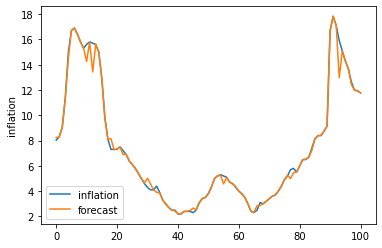

In [22]:
fig, axes = plt.subplots()
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=boost_model.predict(X), label='forecast')

In [23]:
r2_score(boost_model.predict(X), y)

0.9909000440180685

In [24]:
best_model = CatBoostRegressor(n_estimators=2000, depth=4)

In [25]:
best_model.fit(X_train, y_train)

Learning rate set to 0.015636
0:	learn: 4.6315589	total: 692us	remaining: 1.38s
1:	learn: 4.5886134	total: 1.53ms	remaining: 1.53s
2:	learn: 4.5501134	total: 2.1ms	remaining: 1.4s
3:	learn: 4.5104073	total: 2.67ms	remaining: 1.33s
4:	learn: 4.4702103	total: 3.36ms	remaining: 1.34s
5:	learn: 4.4273005	total: 3.91ms	remaining: 1.3s
6:	learn: 4.3937545	total: 4.74ms	remaining: 1.35s
7:	learn: 4.3518480	total: 5.37ms	remaining: 1.34s
8:	learn: 4.3096879	total: 6.55ms	remaining: 1.45s
9:	learn: 4.2772279	total: 7.83ms	remaining: 1.56s
10:	learn: 4.2382316	total: 8.74ms	remaining: 1.58s
11:	learn: 4.2004744	total: 9.69ms	remaining: 1.6s
12:	learn: 4.1704375	total: 10.4ms	remaining: 1.58s
13:	learn: 4.1350851	total: 11.1ms	remaining: 1.57s
14:	learn: 4.0984379	total: 11.8ms	remaining: 1.56s
15:	learn: 4.0601392	total: 12.4ms	remaining: 1.54s
16:	learn: 4.0247322	total: 13.5ms	remaining: 1.57s
17:	learn: 3.9904445	total: 14.1ms	remaining: 1.55s
18:	learn: 3.9577703	total: 15ms	remaining: 1.57s

304:	learn: 0.5942481	total: 148ms	remaining: 821ms
305:	learn: 0.5912402	total: 148ms	remaining: 821ms
306:	learn: 0.5873989	total: 149ms	remaining: 822ms
307:	learn: 0.5835231	total: 150ms	remaining: 821ms
308:	learn: 0.5811216	total: 150ms	remaining: 821ms
309:	learn: 0.5793583	total: 151ms	remaining: 821ms
310:	learn: 0.5760544	total: 151ms	remaining: 820ms
311:	learn: 0.5726586	total: 152ms	remaining: 820ms
312:	learn: 0.5705102	total: 152ms	remaining: 819ms
313:	learn: 0.5673739	total: 153ms	remaining: 819ms
314:	learn: 0.5649456	total: 153ms	remaining: 818ms
315:	learn: 0.5617331	total: 153ms	remaining: 818ms
316:	learn: 0.5593220	total: 154ms	remaining: 817ms
317:	learn: 0.5566175	total: 154ms	remaining: 817ms
318:	learn: 0.5535069	total: 155ms	remaining: 816ms
319:	learn: 0.5503334	total: 156ms	remaining: 818ms
320:	learn: 0.5475877	total: 156ms	remaining: 818ms
321:	learn: 0.5451322	total: 157ms	remaining: 818ms
322:	learn: 0.5431600	total: 158ms	remaining: 818ms
323:	learn: 

651:	learn: 0.2024846	total: 306ms	remaining: 633ms
652:	learn: 0.2019617	total: 307ms	remaining: 633ms
653:	learn: 0.2016536	total: 307ms	remaining: 633ms
654:	learn: 0.2015344	total: 308ms	remaining: 632ms
655:	learn: 0.2008870	total: 308ms	remaining: 632ms
656:	learn: 0.2007691	total: 309ms	remaining: 632ms
657:	learn: 0.2006520	total: 309ms	remaining: 631ms
658:	learn: 0.2000336	total: 310ms	remaining: 630ms
659:	learn: 0.1997888	total: 310ms	remaining: 630ms
660:	learn: 0.1996736	total: 311ms	remaining: 629ms
661:	learn: 0.1992054	total: 311ms	remaining: 629ms
662:	learn: 0.1987268	total: 312ms	remaining: 628ms
663:	learn: 0.1983490	total: 312ms	remaining: 628ms
664:	learn: 0.1979786	total: 312ms	remaining: 627ms
665:	learn: 0.1976153	total: 313ms	remaining: 627ms
666:	learn: 0.1972591	total: 313ms	remaining: 626ms
667:	learn: 0.1969098	total: 314ms	remaining: 626ms
668:	learn: 0.1964136	total: 314ms	remaining: 625ms
669:	learn: 0.1961852	total: 315ms	remaining: 625ms
670:	learn: 

986:	learn: 0.1171117	total: 467ms	remaining: 479ms
987:	learn: 0.1170502	total: 468ms	remaining: 479ms
988:	learn: 0.1167070	total: 468ms	remaining: 479ms
989:	learn: 0.1166457	total: 469ms	remaining: 479ms
990:	learn: 0.1165909	total: 470ms	remaining: 478ms
991:	learn: 0.1163185	total: 470ms	remaining: 478ms
992:	learn: 0.1161811	total: 470ms	remaining: 477ms
993:	learn: 0.1159155	total: 471ms	remaining: 476ms
994:	learn: 0.1157572	total: 471ms	remaining: 476ms
995:	learn: 0.1156968	total: 472ms	remaining: 475ms
996:	learn: 0.1154367	total: 472ms	remaining: 475ms
997:	learn: 0.1153856	total: 473ms	remaining: 475ms
998:	learn: 0.1153320	total: 473ms	remaining: 474ms
999:	learn: 0.1150650	total: 474ms	remaining: 474ms
1000:	learn: 0.1148979	total: 474ms	remaining: 473ms
1001:	learn: 0.1147422	total: 474ms	remaining: 473ms
1002:	learn: 0.1144869	total: 475ms	remaining: 472ms
1003:	learn: 0.1144277	total: 475ms	remaining: 472ms
1004:	learn: 0.1141774	total: 476ms	remaining: 471ms
1005:	l

1263:	learn: 0.0829062	total: 619ms	remaining: 360ms
1264:	learn: 0.0828308	total: 620ms	remaining: 360ms
1265:	learn: 0.0828049	total: 620ms	remaining: 360ms
1266:	learn: 0.0827477	total: 621ms	remaining: 359ms
1267:	learn: 0.0825976	total: 622ms	remaining: 359ms
1268:	learn: 0.0825229	total: 622ms	remaining: 358ms
1269:	learn: 0.0825036	total: 623ms	remaining: 358ms
1270:	learn: 0.0824782	total: 623ms	remaining: 357ms
1271:	learn: 0.0822977	total: 623ms	remaining: 357ms
1272:	learn: 0.0821440	total: 624ms	remaining: 356ms
1273:	learn: 0.0820699	total: 625ms	remaining: 356ms
1274:	learn: 0.0820508	total: 625ms	remaining: 356ms
1275:	learn: 0.0820318	total: 626ms	remaining: 355ms
1276:	learn: 0.0818567	total: 626ms	remaining: 355ms
1277:	learn: 0.0818379	total: 627ms	remaining: 354ms
1278:	learn: 0.0816678	total: 627ms	remaining: 354ms
1279:	learn: 0.0815946	total: 628ms	remaining: 353ms
1280:	learn: 0.0815758	total: 629ms	remaining: 353ms
1281:	learn: 0.0815572	total: 629ms	remaining:

1587:	learn: 0.0602895	total: 775ms	remaining: 201ms
1588:	learn: 0.0602558	total: 775ms	remaining: 201ms
1589:	learn: 0.0602300	total: 776ms	remaining: 200ms
1590:	learn: 0.0602188	total: 776ms	remaining: 200ms
1591:	learn: 0.0600981	total: 777ms	remaining: 199ms
1592:	learn: 0.0600646	total: 777ms	remaining: 199ms
1593:	learn: 0.0600314	total: 778ms	remaining: 198ms
1594:	learn: 0.0600203	total: 778ms	remaining: 198ms
1595:	learn: 0.0599946	total: 779ms	remaining: 197ms
1596:	learn: 0.0598778	total: 779ms	remaining: 197ms
1597:	learn: 0.0598650	total: 779ms	remaining: 196ms
1598:	learn: 0.0598125	total: 780ms	remaining: 196ms
1599:	learn: 0.0597973	total: 780ms	remaining: 195ms
1600:	learn: 0.0597436	total: 781ms	remaining: 195ms
1601:	learn: 0.0597107	total: 781ms	remaining: 194ms
1602:	learn: 0.0596417	total: 782ms	remaining: 194ms
1603:	learn: 0.0595374	total: 782ms	remaining: 193ms
1604:	learn: 0.0594724	total: 783ms	remaining: 193ms
1605:	learn: 0.0594574	total: 783ms	remaining:

1940:	learn: 0.0415314	total: 936ms	remaining: 28.4ms
1941:	learn: 0.0414580	total: 936ms	remaining: 28ms
1942:	learn: 0.0414419	total: 937ms	remaining: 27.5ms
1943:	learn: 0.0414260	total: 938ms	remaining: 27ms
1944:	learn: 0.0413729	total: 938ms	remaining: 26.5ms
1945:	learn: 0.0413334	total: 939ms	remaining: 26ms
1946:	learn: 0.0413008	total: 939ms	remaining: 25.6ms
1947:	learn: 0.0412581	total: 939ms	remaining: 25.1ms
1948:	learn: 0.0411848	total: 940ms	remaining: 24.6ms
1949:	learn: 0.0411163	total: 940ms	remaining: 24.1ms
1950:	learn: 0.0410659	total: 941ms	remaining: 23.6ms
1951:	learn: 0.0410585	total: 941ms	remaining: 23.1ms
1952:	learn: 0.0410270	total: 942ms	remaining: 22.7ms
1953:	learn: 0.0409881	total: 942ms	remaining: 22.2ms
1954:	learn: 0.0409723	total: 943ms	remaining: 21.7ms
1955:	learn: 0.0409567	total: 943ms	remaining: 21.2ms
1956:	learn: 0.0409069	total: 944ms	remaining: 20.7ms
1957:	learn: 0.0408649	total: 944ms	remaining: 20.3ms
1958:	learn: 0.0408336	total: 945m

In [26]:
print(f'MSE на тренировочной выборке: {mean_squared_error(best_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(best_model.predict(X_test), y_test):.3f}')
print(f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}')
MSE_1 = f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}'
r2_1 = f'R_square = {r2_score(boost_model.predict(X), y):.3f}'

MSE на тренировочной выборке: 0.002
MSE на тестовой выборке: 0.591
MSE = 0.124


Text(50, 10, 'R_square = 0.991')

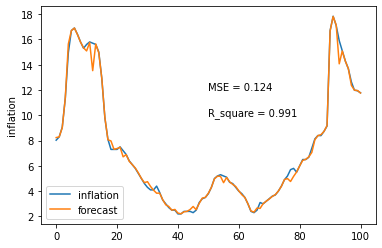

In [27]:
fig, axes = plt.subplots()
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=best_model.predict(X), label='forecast')
axes.text(50, 12, MSE_1)
axes.text(50, 10, r2_1)

In [28]:
feature_importance = pd.Series(data=best_model.get_feature_importance(), index=data.columns[1:25])

In [29]:
df = pd.DataFrame(data=feature_importance.sort_values(ascending=False).head(10))

In [31]:
df[0] = round(df[0], 2)
df.columns=['Влияние, %']
df.index = ['MIACR', 'MIACR в пред. мес.', 'Ожидаемая инфляция', 'Денежная масса M2', 'Ключевая ставка в пред. мес.', 'Ожидаемая инфляция 3 мес. назад', 'Денежная масса 6 мес. назад', 'Ключевая ставка', 'Уровень безработицы в пред. мес.', 'Денежная масса 3 мес. назад']
df

,"Влияние, %"
MIACR,12.17
MIACR в пред. мес.,8.05
Ожидаемая инфляция,7.21
Денежная масса M2,7.21
Ключевая ставка в пред. мес.,6.57
Ожидаемая инфляция 3 мес. назад,6.45
Денежная масса 6 мес. назад,6.22
Ключевая ставка,5.80
Уровень безработицы в пред. мес.,5.51
Денежная масса 3 мес. назад,5.19


[Text(0, 0, '12.17'),
 Text(0, 0, '8.05'),
 Text(0, 0, '7.21'),
 Text(0, 0, '7.21'),
 Text(0, 0, '6.57'),
 Text(0, 0, '6.45'),
 Text(0, 0, '6.22'),
 Text(0, 0, '5.8'),
 Text(0, 0, '5.51'),
 Text(0, 0, '5.19')]

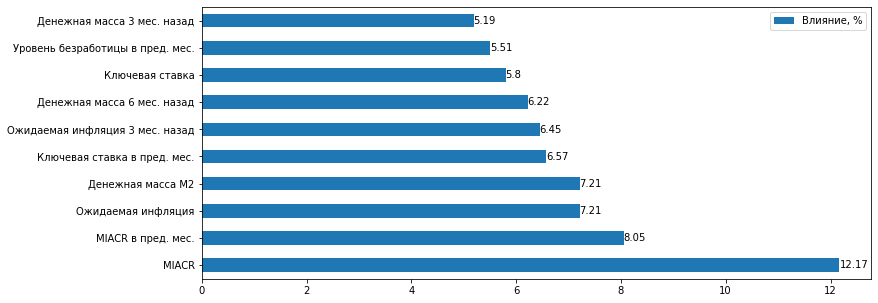

In [34]:
ax = df.plot.barh(figsize=(12, 5))
ax.bar_label(ax.containers[0])

In [35]:
feature_cols = [
    'SA_M2_lag_3',
    'unemployment_lag_1',
    'SA_M2_lag_6', 
    'inf_exp_lag_3',
    'key_rate_lag_1',
    'SA_M2',
    'inf_exp',
    'key_rate',
    'MIACR_lag_1',
    'MIACR', 
]

In [36]:
X = data[feature_cols].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [38]:
best_model = CatBoostRegressor(n_estimators=500, depth=4)

In [39]:
best_model.fit(X_train, y_train)

Learning rate set to 0.048262
0:	learn: 4.5339770	total: 388us	remaining: 194ms
1:	learn: 4.4016726	total: 850us	remaining: 212ms
2:	learn: 4.2757547	total: 1.25ms	remaining: 207ms
3:	learn: 4.1690965	total: 1.63ms	remaining: 202ms
4:	learn: 4.0447626	total: 2.05ms	remaining: 203ms
5:	learn: 3.9306839	total: 2.56ms	remaining: 211ms
6:	learn: 3.8155109	total: 3.02ms	remaining: 213ms
7:	learn: 3.7107187	total: 3.41ms	remaining: 210ms
8:	learn: 3.6104197	total: 3.81ms	remaining: 208ms
9:	learn: 3.5014776	total: 4.23ms	remaining: 207ms
10:	learn: 3.3997731	total: 4.64ms	remaining: 206ms
11:	learn: 3.3128416	total: 5ms	remaining: 203ms
12:	learn: 3.2201442	total: 5.39ms	remaining: 202ms
13:	learn: 3.1572577	total: 5.88ms	remaining: 204ms
14:	learn: 3.0734057	total: 6.36ms	remaining: 205ms
15:	learn: 3.0050416	total: 6.77ms	remaining: 205ms
16:	learn: 2.9233950	total: 7.38ms	remaining: 210ms
17:	learn: 2.8538592	total: 7.87ms	remaining: 211ms
18:	learn: 2.7793901	total: 8.37ms	remaining: 212

365:	learn: 0.1667198	total: 144ms	remaining: 52.7ms
366:	learn: 0.1662733	total: 145ms	remaining: 52.4ms
367:	learn: 0.1656610	total: 145ms	remaining: 52ms
368:	learn: 0.1650226	total: 145ms	remaining: 51.6ms
369:	learn: 0.1646027	total: 146ms	remaining: 51.3ms
370:	learn: 0.1640975	total: 146ms	remaining: 50.9ms
371:	learn: 0.1628307	total: 147ms	remaining: 50.5ms
372:	learn: 0.1623401	total: 147ms	remaining: 50.1ms
373:	learn: 0.1618058	total: 148ms	remaining: 49.7ms
374:	learn: 0.1613474	total: 148ms	remaining: 49.4ms
375:	learn: 0.1601668	total: 148ms	remaining: 48.9ms
376:	learn: 0.1596705	total: 149ms	remaining: 48.5ms
377:	learn: 0.1592663	total: 149ms	remaining: 48.2ms
378:	learn: 0.1587389	total: 150ms	remaining: 47.8ms
379:	learn: 0.1585156	total: 150ms	remaining: 47.4ms
380:	learn: 0.1578659	total: 150ms	remaining: 47ms
381:	learn: 0.1574694	total: 151ms	remaining: 46.6ms
382:	learn: 0.1571733	total: 151ms	remaining: 46.2ms
383:	learn: 0.1567845	total: 152ms	remaining: 45.8

In [40]:
print(f'MSE на тренировочной выборке: {mean_squared_error(best_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(best_model.predict(X_test), y_test):.3f}')
MSE_2 = f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}'
r2_2 = f'R_square = {r2_score(best_model.predict(X), y):.3f}'

MSE на тренировочной выборке: 0.012
MSE на тестовой выборке: 0.799


Text(50, 10, 'R_square = 0.992')

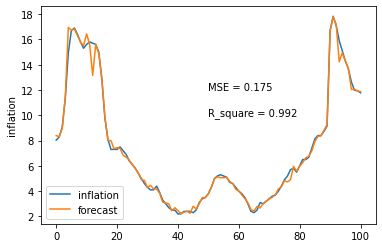

In [41]:
fig, axes = plt.subplots()
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=best_model.predict(X), label='forecast')
axes.text(50, 12, MSE_2)
axes.text(50, 10, r2_2)

In [51]:
feature_cols = [
    'SA_M2_lag_3',
    'inf_exp_lag_3',
    'key_rate_lag_1',
    'key_rate'
]
# попробуем использовать модель для прогноза по меньшему числу факторов-признаков

In [52]:
X = data[feature_cols].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=39)

In [54]:
best_model = CatBoostRegressor(n_estimators=4000, depth=4)

In [55]:
best_model.fit(X_train, y_train)

Learning rate set to 0.0089
0:	learn: 4.8940740	total: 344us	remaining: 1.38s
1:	learn: 4.8720228	total: 813us	remaining: 1.63s
2:	learn: 4.8457016	total: 1.16ms	remaining: 1.55s
3:	learn: 4.8189237	total: 1.6ms	remaining: 1.59s
4:	learn: 4.7920146	total: 1.92ms	remaining: 1.53s
5:	learn: 4.7704717	total: 2.21ms	remaining: 1.47s
6:	learn: 4.7459260	total: 2.55ms	remaining: 1.45s
7:	learn: 4.7196000	total: 2.87ms	remaining: 1.43s
8:	learn: 4.7005146	total: 3.18ms	remaining: 1.41s
9:	learn: 4.6772641	total: 3.55ms	remaining: 1.42s
10:	learn: 4.6514867	total: 4.37ms	remaining: 1.58s
11:	learn: 4.6287059	total: 5.2ms	remaining: 1.73s
12:	learn: 4.6055640	total: 5.81ms	remaining: 1.78s
13:	learn: 4.5789736	total: 6.17ms	remaining: 1.76s
14:	learn: 4.5547700	total: 6.8ms	remaining: 1.81s
15:	learn: 4.5324344	total: 7.25ms	remaining: 1.8s
16:	learn: 4.5111642	total: 7.61ms	remaining: 1.78s
17:	learn: 4.4869542	total: 7.92ms	remaining: 1.75s
18:	learn: 4.4670855	total: 8.29ms	remaining: 1.74s


431:	learn: 0.9343166	total: 129ms	remaining: 1.07s
432:	learn: 0.9321528	total: 130ms	remaining: 1.07s
433:	learn: 0.9301531	total: 130ms	remaining: 1.07s
434:	learn: 0.9291907	total: 130ms	remaining: 1.07s
435:	learn: 0.9268641	total: 131ms	remaining: 1.07s
436:	learn: 0.9240705	total: 131ms	remaining: 1.07s
437:	learn: 0.9210800	total: 131ms	remaining: 1.07s
438:	learn: 0.9189926	total: 132ms	remaining: 1.07s
439:	learn: 0.9162007	total: 132ms	remaining: 1.07s
440:	learn: 0.9147376	total: 132ms	remaining: 1.07s
441:	learn: 0.9129849	total: 133ms	remaining: 1.07s
442:	learn: 0.9114854	total: 133ms	remaining: 1.07s
443:	learn: 0.9103245	total: 133ms	remaining: 1.06s
444:	learn: 0.9077823	total: 133ms	remaining: 1.06s
445:	learn: 0.9057059	total: 134ms	remaining: 1.06s
446:	learn: 0.9030597	total: 134ms	remaining: 1.06s
447:	learn: 0.9008069	total: 134ms	remaining: 1.06s
448:	learn: 0.8987172	total: 134ms	remaining: 1.06s
449:	learn: 0.8965070	total: 135ms	remaining: 1.06s
450:	learn: 

914:	learn: 0.4332663	total: 274ms	remaining: 925ms
915:	learn: 0.4329071	total: 275ms	remaining: 925ms
916:	learn: 0.4325509	total: 275ms	remaining: 925ms
917:	learn: 0.4321451	total: 276ms	remaining: 925ms
918:	learn: 0.4316044	total: 276ms	remaining: 925ms
919:	learn: 0.4313038	total: 276ms	remaining: 925ms
920:	learn: 0.4308185	total: 277ms	remaining: 925ms
921:	learn: 0.4302865	total: 277ms	remaining: 924ms
922:	learn: 0.4297594	total: 277ms	remaining: 924ms
923:	learn: 0.4294733	total: 277ms	remaining: 923ms
924:	learn: 0.4290000	total: 278ms	remaining: 923ms
925:	learn: 0.4287204	total: 278ms	remaining: 923ms
926:	learn: 0.4282510	total: 278ms	remaining: 922ms
927:	learn: 0.4277857	total: 279ms	remaining: 922ms
928:	learn: 0.4274319	total: 279ms	remaining: 922ms
929:	learn: 0.4270810	total: 279ms	remaining: 922ms
930:	learn: 0.4267330	total: 279ms	remaining: 921ms
931:	learn: 0.4262219	total: 280ms	remaining: 921ms
932:	learn: 0.4259271	total: 280ms	remaining: 920ms
933:	learn: 

1383:	learn: 0.3229570	total: 418ms	remaining: 789ms
1384:	learn: 0.3226794	total: 418ms	remaining: 789ms
1385:	learn: 0.3226107	total: 418ms	remaining: 789ms
1386:	learn: 0.3222594	total: 419ms	remaining: 789ms
1387:	learn: 0.3220179	total: 419ms	remaining: 789ms
1388:	learn: 0.3217433	total: 419ms	remaining: 788ms
1389:	learn: 0.3216790	total: 420ms	remaining: 788ms
1390:	learn: 0.3214201	total: 420ms	remaining: 788ms
1391:	learn: 0.3212082	total: 420ms	remaining: 787ms
1392:	learn: 0.3211402	total: 421ms	remaining: 787ms
1393:	learn: 0.3208842	total: 421ms	remaining: 787ms
1394:	learn: 0.3208205	total: 421ms	remaining: 786ms
1395:	learn: 0.3204343	total: 421ms	remaining: 786ms
1396:	learn: 0.3201630	total: 422ms	remaining: 786ms
1397:	learn: 0.3200955	total: 422ms	remaining: 785ms
1398:	learn: 0.3198420	total: 422ms	remaining: 785ms
1399:	learn: 0.3196193	total: 423ms	remaining: 785ms
1400:	learn: 0.3193501	total: 423ms	remaining: 784ms
1401:	learn: 0.3192832	total: 423ms	remaining:

1870:	learn: 0.2365683	total: 563ms	remaining: 640ms
1871:	learn: 0.2365139	total: 563ms	remaining: 640ms
1872:	learn: 0.2362912	total: 564ms	remaining: 640ms
1873:	learn: 0.2361800	total: 564ms	remaining: 640ms
1874:	learn: 0.2360696	total: 564ms	remaining: 639ms
1875:	learn: 0.2359602	total: 565ms	remaining: 639ms
1876:	learn: 0.2359060	total: 565ms	remaining: 639ms
1877:	learn: 0.2357974	total: 565ms	remaining: 639ms
1878:	learn: 0.2357434	total: 566ms	remaining: 638ms
1879:	learn: 0.2356293	total: 566ms	remaining: 638ms
1880:	learn: 0.2355443	total: 566ms	remaining: 638ms
1881:	learn: 0.2354367	total: 566ms	remaining: 637ms
1882:	learn: 0.2353830	total: 567ms	remaining: 637ms
1883:	learn: 0.2352762	total: 567ms	remaining: 637ms
1884:	learn: 0.2351087	total: 567ms	remaining: 637ms
1885:	learn: 0.2350028	total: 568ms	remaining: 636ms
1886:	learn: 0.2348979	total: 568ms	remaining: 636ms
1887:	learn: 0.2348444	total: 568ms	remaining: 636ms
1888:	learn: 0.2347966	total: 568ms	remaining:

2342:	learn: 0.1850853	total: 709ms	remaining: 502ms
2343:	learn: 0.1849890	total: 710ms	remaining: 501ms
2344:	learn: 0.1848073	total: 710ms	remaining: 501ms
2345:	learn: 0.1847615	total: 711ms	remaining: 501ms
2346:	learn: 0.1847159	total: 711ms	remaining: 501ms
2347:	learn: 0.1845407	total: 711ms	remaining: 501ms
2348:	learn: 0.1844334	total: 712ms	remaining: 500ms
2349:	learn: 0.1844109	total: 712ms	remaining: 500ms
2350:	learn: 0.1842164	total: 712ms	remaining: 500ms
2351:	learn: 0.1841712	total: 713ms	remaining: 499ms
2352:	learn: 0.1841489	total: 713ms	remaining: 499ms
2353:	learn: 0.1839808	total: 713ms	remaining: 499ms
2354:	learn: 0.1838482	total: 713ms	remaining: 498ms
2355:	learn: 0.1837818	total: 714ms	remaining: 498ms
2356:	learn: 0.1836869	total: 714ms	remaining: 498ms
2357:	learn: 0.1836009	total: 714ms	remaining: 497ms
2358:	learn: 0.1834283	total: 715ms	remaining: 497ms
2359:	learn: 0.1833835	total: 715ms	remaining: 497ms
2360:	learn: 0.1832776	total: 715ms	remaining:

2801:	learn: 0.1424346	total: 855ms	remaining: 366ms
2802:	learn: 0.1423128	total: 855ms	remaining: 365ms
2803:	learn: 0.1422842	total: 856ms	remaining: 365ms
2804:	learn: 0.1421955	total: 856ms	remaining: 365ms
2805:	learn: 0.1421269	total: 856ms	remaining: 364ms
2806:	learn: 0.1420796	total: 857ms	remaining: 364ms
2807:	learn: 0.1420074	total: 857ms	remaining: 364ms
2808:	learn: 0.1419311	total: 857ms	remaining: 363ms
2809:	learn: 0.1418433	total: 857ms	remaining: 363ms
2810:	learn: 0.1417233	total: 858ms	remaining: 363ms
2811:	learn: 0.1416517	total: 858ms	remaining: 363ms
2812:	learn: 0.1415758	total: 858ms	remaining: 362ms
2813:	learn: 0.1415129	total: 859ms	remaining: 362ms
2814:	learn: 0.1414376	total: 859ms	remaining: 362ms
2815:	learn: 0.1413749	total: 859ms	remaining: 361ms
2816:	learn: 0.1413281	total: 859ms	remaining: 361ms
2817:	learn: 0.1412657	total: 860ms	remaining: 361ms
2818:	learn: 0.1412116	total: 860ms	remaining: 360ms
2819:	learn: 0.1411495	total: 860ms	remaining:

3272:	learn: 0.1172439	total: 995ms	remaining: 221ms
3273:	learn: 0.1172270	total: 996ms	remaining: 221ms
3274:	learn: 0.1171859	total: 996ms	remaining: 220ms
3275:	learn: 0.1171492	total: 996ms	remaining: 220ms
3276:	learn: 0.1171043	total: 996ms	remaining: 220ms
3277:	learn: 0.1170563	total: 997ms	remaining: 220ms
3278:	learn: 0.1170017	total: 997ms	remaining: 219ms
3279:	learn: 0.1169610	total: 998ms	remaining: 219ms
3280:	learn: 0.1168970	total: 998ms	remaining: 219ms
3281:	learn: 0.1168572	total: 998ms	remaining: 218ms
3282:	learn: 0.1168166	total: 998ms	remaining: 218ms
3283:	learn: 0.1167770	total: 999ms	remaining: 218ms
3284:	learn: 0.1167601	total: 999ms	remaining: 217ms
3285:	learn: 0.1167434	total: 999ms	remaining: 217ms
3286:	learn: 0.1166791	total: 1000ms	remaining: 217ms
3287:	learn: 0.1166433	total: 1000ms	remaining: 217ms
3288:	learn: 0.1166030	total: 1s	remaining: 216ms
3289:	learn: 0.1165585	total: 1s	remaining: 216ms
3290:	learn: 0.1164995	total: 1s	remaining: 216ms


3783:	learn: 0.0990474	total: 1.14s	remaining: 65.1ms
3784:	learn: 0.0990120	total: 1.14s	remaining: 64.8ms
3785:	learn: 0.0989729	total: 1.14s	remaining: 64.5ms
3786:	learn: 0.0989442	total: 1.14s	remaining: 64.3ms
3787:	learn: 0.0989092	total: 1.14s	remaining: 64ms
3788:	learn: 0.0988743	total: 1.14s	remaining: 63.7ms
3789:	learn: 0.0988398	total: 1.14s	remaining: 63.4ms
3790:	learn: 0.0988014	total: 1.14s	remaining: 63.1ms
3791:	learn: 0.0987729	total: 1.14s	remaining: 62.7ms
3792:	learn: 0.0987386	total: 1.14s	remaining: 62.4ms
3793:	learn: 0.0987047	total: 1.14s	remaining: 62.1ms
3794:	learn: 0.0986864	total: 1.14s	remaining: 61.8ms
3795:	learn: 0.0986486	total: 1.14s	remaining: 61.5ms
3796:	learn: 0.0986065	total: 1.15s	remaining: 61.2ms
3797:	learn: 0.0985829	total: 1.15s	remaining: 60.9ms
3798:	learn: 0.0985492	total: 1.15s	remaining: 60.6ms
3799:	learn: 0.0985158	total: 1.15s	remaining: 60.3ms
3800:	learn: 0.0984826	total: 1.15s	remaining: 60ms
3801:	learn: 0.0984497	total: 1.

In [56]:
print(f'MSE на тренировочной выборке: {mean_squared_error(best_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(best_model.predict(X_test), y_test):.3f}')
MSE_3 = f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}'
r2_3 = f'R_square = {r2_score(best_model.predict(X), y):.3f}'

MSE на тренировочной выборке: 0.008
MSE на тестовой выборке: 0.834


Text(50, 10, 'R_square = 0.992')

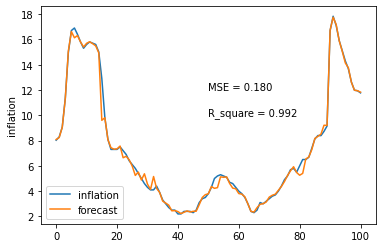

In [57]:
fig, axes = plt.subplots()
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=best_model.predict(X), label='forecast')
axes.text(50, 12, MSE_3)
axes.text(50, 10, r2_3)